
---
# **1. Defining Problem Statement and Analysing basic metrics**
---



**Problem Statement**
  
  Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

**Netflix Dataset**

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

The dataset consists of a list of all the TV shows/movies available on Netflix:

Show_id: Unique ID for every Movie / Tv Show

Type: Identifier - A Movie or TV Show

Title: Title of the Movie / Tv Show

Director: Director of the Movie

Cast: Actors involved in the movie/show

Country: Country where the movie/show was produced

Date_added: Date it was added on Netflix

Release_year: Actual Release year of the movie/show

Rating: TV Rating of the movie/show

Duration: Total Duration - in minutes or number of seasons

Listed_in: Genre

Description: The summary description

**Objectives of the Project**



*   Perform EDA on the given dataset and find insights.
*   Provide Useful Insights and Business recommendations that can help the business to grow.




Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the File

In [ ]:
!gdown 1layCceJUFuu48LMaPvmEbv7h_YodmY5w

Downloading...
From: https://drive.google.com/uc?id=1layCceJUFuu48LMaPvmEbv7h_YodmY5w
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 136MB/s]


In [ ]:
df = pd.read_csv("/content/netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# To see the type of Data Frame
type(df)

pandas.core.frame.DataFrame

In [ ]:
type(df["country"])

pandas.core.series.Series



---
# **2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary**

---




In [ ]:
# shape of the Data Frame
df.shape

(8807, 12)

In [ ]:
len(df)

8807

In [ ]:
# datatype of all the attributes
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8709 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          8709 non-null   object        
 1   type             8709 non-null   object        
 2   title            8709 non-null   object        
 3   director         6168 non-null   object        
 4   cast             7892 non-null   object        
 5   country          7882 non-null   object        
 6   date_added       8709 non-null   datetime64[ns]
 7   release_year     8709 non-null   int64         
 8   rating           8705 non-null   object        
 9   duration         8706 non-null   object        
 10  listed_in        8709 non-null   object        
 11  description      8709 non-null   object        
 12  date_added_year  8709 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(10)
memory usage: 918.5+ KB




---
**Missing Value**


---




In [ ]:
# handling missing values
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

It shows there are null values

director : 2634

cast : 825

country : 831

date_added : 10

rating : 4

duration : 3

In [ ]:
# filling the missing values
df["duration"].fillna(0, inplace = True)
df["rating"].fillna("unknown rating", inplace = True)
df["country"].fillna("unknown country", inplace = True)
df["cast"].fillna("unknown cast", inplace = True)
df["director"].fillna("unknown director", inplace = True)

In [ ]:
# Filling date added(NaT) values with a specific date
df['date_added'].fillna(pd.Timestamp('1970-01-01'), inplace=True)

In [ ]:
# checking the missing val after handled
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# statistical summary
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
# statistical summary for categorical columns
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4




---
# **3. Non-Graphical Analysis: Value counts and unique attributes**
---





In [ ]:
# number of the unique values in the data
for i in df.columns:
  print(i, ":", df[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


**Show-id**

In [ ]:
# here every movies are unique movies
df["show_id"].nunique()

8807

**Type**

In [ ]:
# 2 types of content present in dataset - either Movie or TV Show
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
type_counts = df["type"].value_counts()
type_counts

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

**title**

In [ ]:
# every titles are unique
df["title"].nunique()

8807

**director**

In [ ]:
df["director"].nunique()

4528

In [ ]:
director_counts = df["director"].value_counts()
director_counts

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

**cast**

In [ ]:
df["cast"].nunique()

7692

In [ ]:
# creating a deep copy of df
df_cast = df.copy()
df_cast["cast"] = df_cast["cast"].str.split(",")

In [ ]:
df_cast = df_cast.explode(column = "cast")

In [ ]:
df_cast["cast"] = df_cast["cast"].str.strip()

In [ ]:
df_cast["cast"].value_counts()

cast
Anupam Kher                43
Shah Rukh Khan             35
Julie Tejwani              33
Naseeruddin Shah           32
Takahiro Sakurai           32
                           ..
Maryam Zaree                1
Melanie Straub              1
Gabriela Maria Schmeide     1
Helena Zengel               1
Chittaranjan Tripathy       1
Name: count, Length: 36439, dtype: int64

**country**

In [ ]:
df["country"].nunique()

748

In [ ]:
# here the country are seperated by comma thus need to explode the columns
df['country'][2001]

'France, United States'

In [ ]:
# creating a deep copy of df
df_cntry = df.copy()
df_cntry["country"] = df_cntry["country"].str.split(",")

In [ ]:
df_cntry = df_cntry.explode(column='country')

In [ ]:
df_cntry['country'] = df_cntry['country'].str.strip()

In [ ]:
df_cntry["country"].nunique()

123

In [ ]:
df_cntry["country"].value_counts()

country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: count, Length: 123, dtype: int64

**data added**

In [ ]:
# converting the release_year and date added to datetime
df["date_added"] = pd.to_datetime(df["date_added"], errors='coerce')

In [ ]:
print(df['date_added'].max(),df['date_added'].min())

2021-09-25 00:00:00 2008-01-01 00:00:00


 **release year**

In [ ]:
df.release_year.min() , df.release_year.max()

(1925, 2021)

**rating**

In [ ]:
df["rating"].value_counts()

rating
TV-MA             3207
TV-14             2160
TV-PG              863
R                  799
PG-13              490
TV-Y7              334
TV-Y               307
PG                 287
TV-G               220
NR                  80
G                   41
TV-Y7-FV             6
unknown rating       4
NC-17                3
UR                   3
74 min               1
84 min               1
66 min               1
Name: count, dtype: int64

**duration**

In [ ]:
movies  = df.loc[df['type'] == 'Movie']
tv_shows = df.loc[df['type'] == 'TV Show']

In [ ]:
movies.duration.value_counts()

duration
90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
          ... 
212 min      1
8 min        1
186 min      1
193 min      1
191 min      1
Name: count, Length: 205, dtype: int64

In [ ]:
tv_shows.duration.value_counts()

duration
1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: count, dtype: int64

**listed_in**

In [ ]:
# listed in is the genre here
df_listed = df.copy()
df_listed['listed_in'] = df_listed['listed_in'].str.split(',')
df_listed = df_listed.explode(column='listed_in')
df_listed['listed_in'] = df_listed['listed_in'].str.strip()
df_listed['listed_in'].value_counts()

listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows             

In [ ]:
df[["type", "country"]].value_counts()

type     country                   
Movie    United States                 2058
         India                          893
TV Show  United States                  760
Movie    unknown country                440
TV Show  unknown country                391
                                       ... 
Movie    Philippines, Singapore           1
         Philippines, United States       1
         Poland,                          1
         Poland, West Germany             1
         , France, Algeria                1
Name: count, Length: 849, dtype: int64

Which are different ratings available on Netflix in each type of content? Check the number of content released in each type.

In [ ]:
df.groupby(['type' , 'rating'])['show_id'].count()

type     rating        
Movie    66 min               1
         74 min               1
         84 min               1
         G                   41
         NC-17                3
         NR                  75
         PG                 287
         PG-13              490
         R                  797
         TV-14             1427
         TV-G               126
         TV-MA             2062
         TV-PG              540
         TV-Y               131
         TV-Y7              139
         TV-Y7-FV             5
         UR                   3
         unknown rating       2
TV Show  NR                   5
         R                    2
         TV-14              733
         TV-G                94
         TV-MA             1145
         TV-PG              323
         TV-Y               176
         TV-Y7              195
         TV-Y7-FV             1
         unknown rating       2
Name: show_id, dtype: int64



---
# **4. Visual Analysis - Univariate, Bivariate after pre-processing of the data**
---





**univariate analysis**

**Histogram**

In [ ]:
df.release_year.min() , df.release_year.max()

(1925, 2021)

The release year ranges from 1925 to 2021

<Axes: xlabel='release_year', ylabel='Count'>

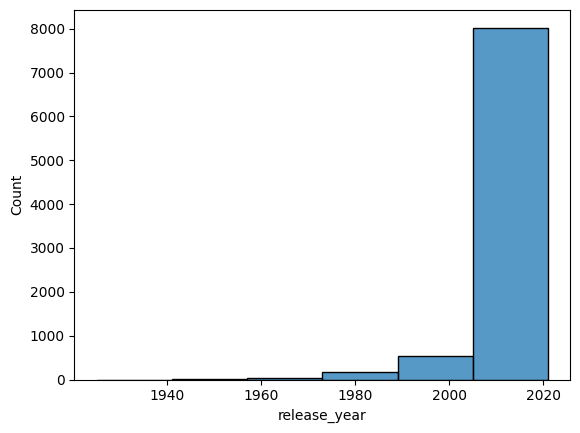

In [ ]:
sns.histplot(df["release_year"], bins = 6)

The netflix data contains the release year ranges from 1925 to 2021

**distplot**

<ipython-input-167-dbc70afa73e0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['release_year'], kde=True, bins=30)


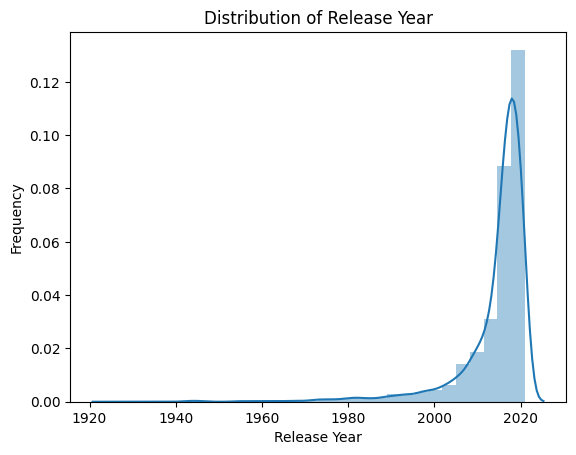

In [ ]:
sns.distplot(df['release_year'], kde=True, bins=30)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

The netflix data contains the release year ranges from 1925 to 2021. It shows there is a drastric increase from 2018

# 1] How has the number of movies released per year changed over the last 20-30 years?

In [ ]:
# non graphical analysis
movies_by_year = df[df["type"] == "Movie"].groupby("release_year").size()
movies_by_year_last_30_years = movies_by_year.tail(30)
print(movies_by_year_last_30_years)

release_year
1992     20
1993     24
1994     20
1995     23
1996     21
1997     34
1998     32
1999     32
2000     33
2001     40
2002     44
2003     51
2004     55
2005     67
2006     82
2007     74
2008    113
2009    118
2010    154
2011    145
2012    173
2013    225
2014    264
2015    398
2016    658
2017    767
2018    767
2019    633
2020    517
2021    277
dtype: int64


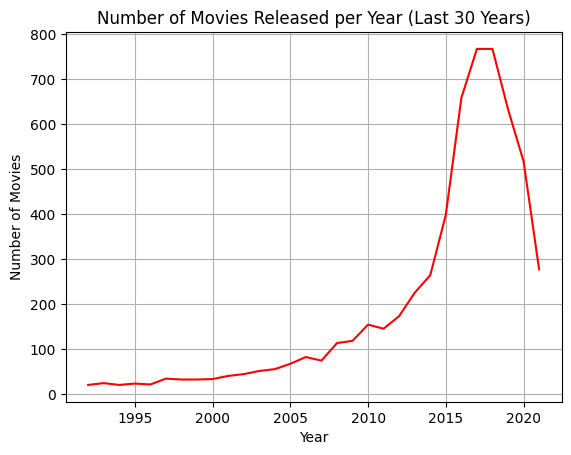

In [ ]:
# graphical analysis
sns.lineplot(data = movies_by_year_last_30_years, color = "red")
plt.title('Number of Movies Released per Year (Last 30 Years)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

The data shows a generally increasing trend in the number of movies released annually, with notable peaks in 2017 and 2018 at 767 movies each. Recent years exhibit a slight decline from these peak levels, suggesting potential saturation or shifting industry dynamics. Overall, the data reflects a dynamic film industry influenced by technological advancements and changing consumer behaviors.







**Total movies and tv-shows by the release year**

In [ ]:
d = df.groupby(['type' , 'release_year'])['show_id'].count().reset_index()
d.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)
d

,type,release_year,total movies/TV shows
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
114,TV Show,2017,265
115,TV Show,2018,380
116,TV Show,2019,397
117,TV Show,2020,436


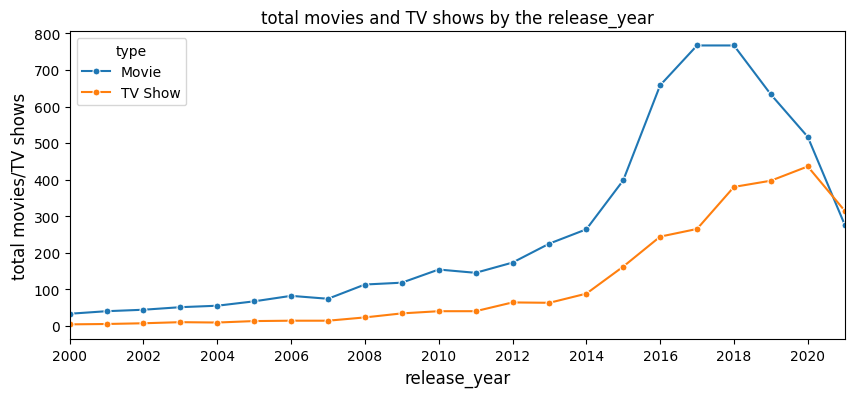

In [ ]:
plt.figure(figsize = (10,4))
sns.lineplot(data = d , x = 'release_year' , y = 'total movies/TV shows' , hue = 'type' , marker = 'o'  , ms = 5 )
plt.xlabel('release_year' , fontsize = 12)
plt.ylabel('total movies/TV shows' , fontsize = 12)
plt.title('total movies and TV shows by the release_year' , fontsize = 12)
plt.xlim( left = 2000 , right = 2021)
plt.xticks(np.arange(2000 , 2021 , 2))
plt.show()

Observation:




*   2018 marks the highest number of movie and TV show releases.

*   Since 2018, A drop in movies is seen and rise in TV shows is observed


*   clearly, and TV shows surpasses the movies count in mid 2020.



# 2] Distribution of TV shows vs movies

In [ ]:
# Non-Graphical
type_counts = df["type"].value_counts()
type_counts

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

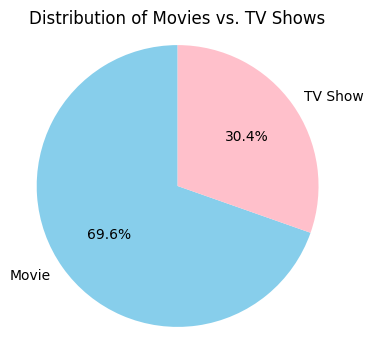

In [ ]:
# Graphical
plt.figure(figsize = (4, 4))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=["skyblue", "pink"])
plt.title('Distribution of Movies vs. TV Shows')
plt.axis('equal')
plt.show()

It is observed that , around 70% content is Movies and around 30% content is TV shows.

**Top 10 Countries by Number of Movies Produced**

In [ ]:
movies_df = df[df['type'] == 'Movie']
movies_by_country = movies_df.groupby('country')['title'].nunique().sort_values(ascending=False).head(10)
print("Top 10 Countries by Number of Movies Produced:\n", movies_by_country)

Top 10 Countries by Number of Movies Produced:
 country
United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Japan               76
Name: title, dtype: int64


**Top 10 Countries by Number of TV_shows Produced**

In [ ]:
tv_shows_df = df[df['type'] == 'TV Show']
tv_shows_by_country = tv_shows_df.groupby('country')['title'].nunique().sort_values(ascending=False).head(10)
print("Top 10 Countries by Number of TV Shows Produced:\n", tv_shows_by_country)

Top 10 Countries by Number of TV Shows Produced:
 country
United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Australia          48
Spain              48
Name: title, dtype: int64


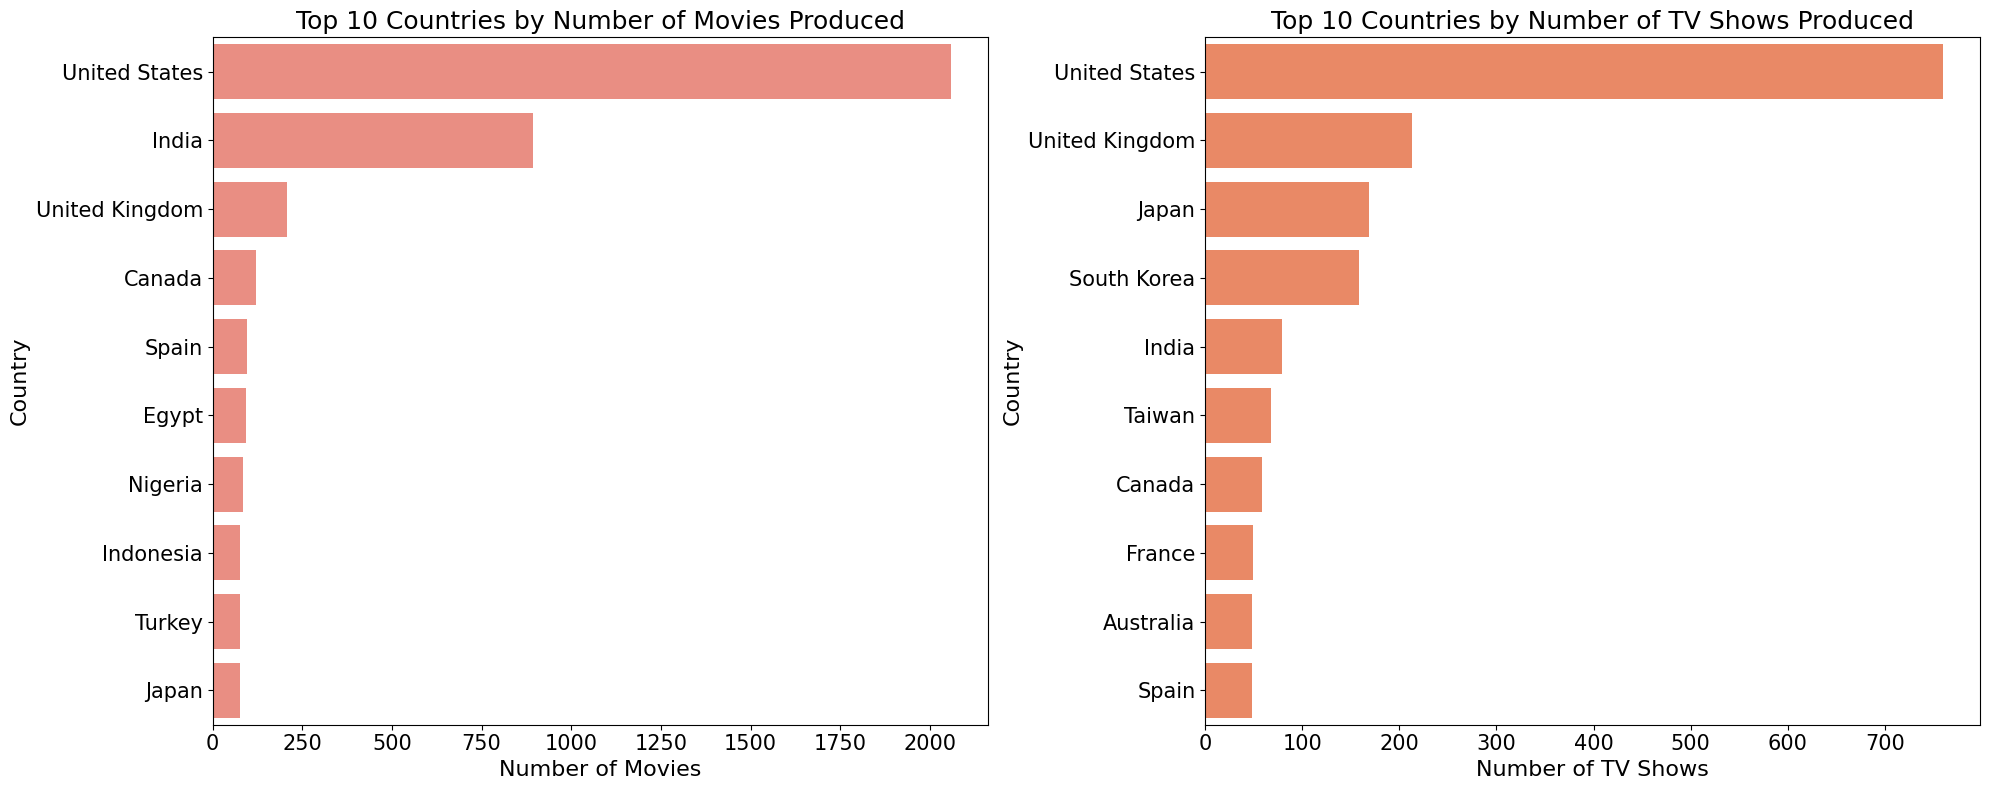

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot for Movies
sns.barplot(x=movies_by_country.values, y=movies_by_country.index, ax=axs[0], color = "salmon")
axs[0].set_title('Top 10 Countries by Number of Movies Produced', fontsize = 18)
axs[0].set_xlabel('Number of Movies', fontsize = 16)
axs[0].set_ylabel('Country', fontsize = 16)
axs[0].tick_params(axis='both', which='major', labelsize=15)

# Plot for TV Shows
sns.barplot(x=tv_shows_by_country.values, y=tv_shows_by_country.index, ax=axs[1], color = "coral")
axs[1].set_title('Top 10 Countries by Number of TV Shows Produced', fontsize = 18)
axs[1].set_xlabel('Number of TV Shows', fontsize = 16)
axs[1].set_ylabel('Country', fontsize = 16)
axs[1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()



*  The United States leads in both TV shows (760) and movies (2058) on Netflix, showcasing its dominant role in global content production.
*    India follows closely with a significant presence in movies (893) and a notable contribution to TV shows (79), highlighting its strong entertainment industry.

*   The United Kingdom excels in TV shows (213) but ranks lower in movies (206), indicating a specialization in television content production.









# 3] What is the best time to launch a TV show?

 Best Month to Release a TV Show or Movie:

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
print(df['date_added'].isna().sum())
# Filling NaT values with a specific date
df['date_added'].fillna(pd.Timestamp('1970-01-01'), inplace=True)
print(df['date_added'].dtypes)

98
datetime64[ns]


In [ ]:
# Extracting month from 'date_added'
df['month_added'] = df['date_added'].dt.month

# Filtering  movies
movies = df[df['type'] == 'Movie']

# Count movies added per month
movies_per_month = movies['month_added'].value_counts().sort_index()

# Extracting month from 'date_added'
df['month_added'] = df['date_added'].dt.month

# Filtering  TV shows
tv_shows = df[df['type'] == 'TV Show']

# Count TV shows added per month
tv_shows_per_month = tv_shows['month_added'].value_counts().sort_index()



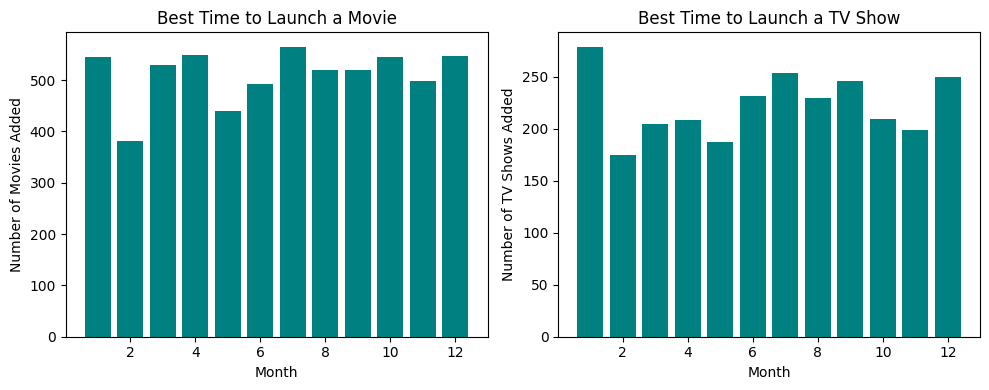

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot for Movies
ax1.bar(movies_per_month.index, movies_per_month.values, color='teal')
ax1.set_title('Best Time to Launch a Movie')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Movies Added')

# Plot for TV Shows
ax2.bar(tv_shows_per_month.index, tv_shows_per_month.values, color='teal')
ax2.set_title('Best Time to Launch a TV Show')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of TV Shows Added')

# Adjust layout and display plot
plt.tight_layout()
plt.show()

The best time to launch a movie is july, january, december and April.

The best time to launch a tv-show is january, july and december

# 4] Analysis of actors/directors of different types of shows/movies

**Top 10 director by movies and tv-shows**

In [ ]:
# creating a deep copy of df
df_copy = df.copy()
df_copy["director"] = df_copy["director"].str.split(",")
df_copy = df_copy.explode(column='director')
df_copy['director'] = df_copy['director'].str.strip()
df_copy["director"].value_counts()

director
Rajiv Chilaka     22
Jan Suter         21
Raúl Campos       19
Suhas Kadav       16
Marcus Raboy      16
                  ..
Raymie Muzquiz     1
Stu Livingston     1
Joe Menendez       1
Eric Bross         1
Mozez Singh        1
Name: count, Length: 4993, dtype: int64

In [ ]:
# total Movies and tvshows directed by top 10 directors
top_10_dir = df_copy.director.value_counts().head(10).index
df_new2 = df_copy.loc[df_copy['director'].isin(top_10_dir)]

<ipython-input-154-8e7d03050205>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_new2 , y = 'director' , order = top_10_dir , orient = 'v', palette='viridis')


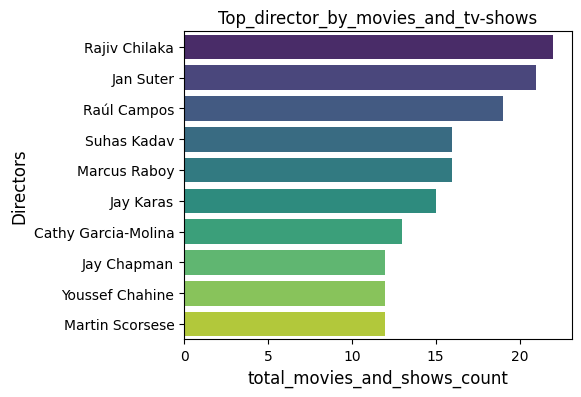

In [ ]:
plt.figure(figsize= (5 , 4))
sns.countplot(data = df_new2 , y = 'director' , order = top_10_dir , orient = 'v', palette='viridis')
plt.xlabel('total_movies_and_shows_count' , fontsize = 12)
plt.ylabel('Directors' , fontsize = 12)
plt.title('Top_director_by_movies_and_tv-shows')
plt.show()

Observation:

The top 3 directors on Netflix in terms of count of movies directed by them are - Rajiv Chilaka, Jan Suter and Raúl Campos

**Top 10 director by movies**

In [ ]:
# creating a deep copy of df
movies = movies.copy()
movies["director"] = movies["director"].str.split(",")
movies = movies.explode(column='director')
movies['director'] = movies['director'].str.strip()
movies["director"].value_counts()

director
Rajiv Chilaka        22
Jan Suter            21
Raúl Campos          19
Suhas Kadav          16
Marcus Raboy         15
                     ..
Vrinda Samartha       1
Nicholaus Goossen     1
Stig Bergqvist        1
Paul Demeyer          1
Mozez Singh           1
Name: count, Length: 4777, dtype: int64

In [ ]:
# total Movies/tvshows directed by top 10 directors
top_10_dir = movies.director.value_counts().head(10).index
df_new = movies.loc[movies['director'].isin(top_10_dir)]

<ipython-input-146-f0767d280921>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_new , y = 'director' , order = top_10_dir , orient = 'v', palette='viridis')


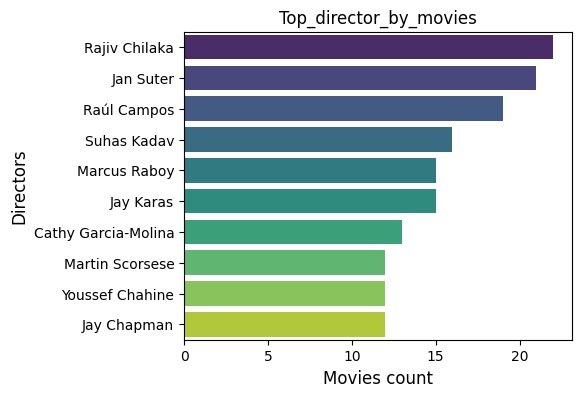

In [ ]:
plt.figure(figsize= (5 , 4))
sns.countplot(data = df_new , y = 'director' , order = top_10_dir , orient = 'v', palette='viridis')
plt.xlabel('total_movies' , fontsize = 12)
plt.xlabel('Movies count')
plt.ylabel('Directors' , fontsize = 12)
plt.title('Top_director_by_movies')
plt.show()

Observation:

The top 3 directors on Netflix in terms of count of movies directed by them are - Rajiv Chilaka, Jan Suter and Raúl Campos

**Top 10 director by TV shows**

In [ ]:
tv_shows["director"] = tv_shows["director"].str.split(",")
tv_shows = tv_shows.explode(column='director')
tv_shows['director'] = tv_shows['director'].str.strip()
tv_shows["director"].value_counts()

<ipython-input-144-5b8247b74091>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows["director"] = tv_shows["director"].str.split(",")


director
Alastair Fothergill      3
Ken Burns                3
Jung-ah Im               2
Gautham Vasudev Menon    2
Iginio Straffi           2
                        ..
Jesse Vile               1
Ellena Wood              1
Picky Talarico           1
Pedro Waddington         1
Michael Cumming          1
Name: count, Length: 299, dtype: int64

In [ ]:
top_10_dir = tv_shows.director.value_counts().head(10).index
df_new1 = tv_shows.loc[tv_shows['director'].isin(top_10_dir)]

<ipython-input-149-6ec81b090aae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_new1 , y = 'director' , order = top_10_dir , orient = 'v', palette='viridis')


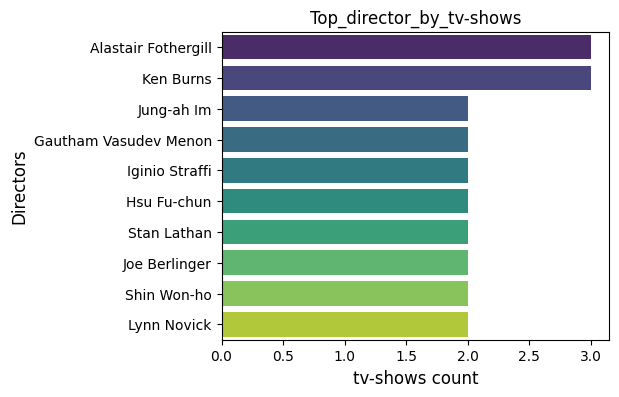

In [ ]:
plt.figure(figsize= (5 , 4))
sns.countplot(data = df_new1 , y = 'director' , order = top_10_dir , orient = 'v', palette='viridis')
plt.xlabel('total_movies' , fontsize = 12)
plt.xlabel('tv-shows count')
plt.ylabel('Directors' , fontsize = 12)
plt.title('Top_director_by_tv-shows')
plt.show()

Observation:

The top 3 directors on Netflix in terms of count of tv-shows directed by them are - Alastair Fothergill, Ken Burns and Jung-ah Im  

# 5] Does Netflix has more focus on TV Shows than movies in recent years

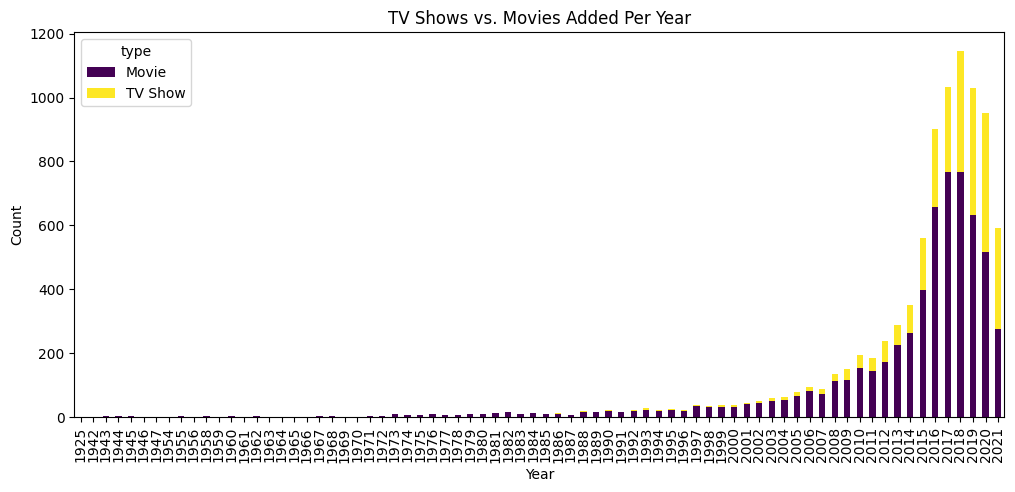

In [ ]:
content_per_year = df.groupby(['release_year', 'type']).size().unstack()
content_per_year.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 5))
plt.title('TV Shows vs. Movies Added Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


In recent years, Netflix has focused more on releasing TV shows than movies. This shift shows Netflix responding to what viewers prefer: ongoing series that tell longer stories instead of standalone films. It's part of a broader trend where people are watching more TV series and fewer movies.







# 6] Understanding what content is available in different countries

**What type of content is available in different countries?**

**count plot**

In [ ]:
# Non graphical analysis
content_by_country = df_cntry.groupby(['country'])['type'].value_counts().unstack().fillna(0)
print(content_by_country)

type          Movie  TV Show
country                     
                6.0      1.0
Afghanistan     1.0      0.0
Albania         1.0      0.0
Algeria         3.0      0.0
Angola          1.0      0.0
...             ...      ...
Vatican City    1.0      0.0
Venezuela       4.0      0.0
Vietnam         7.0      0.0
West Germany    3.0      2.0
Zimbabwe        3.0      0.0

[123 rows x 2 columns]


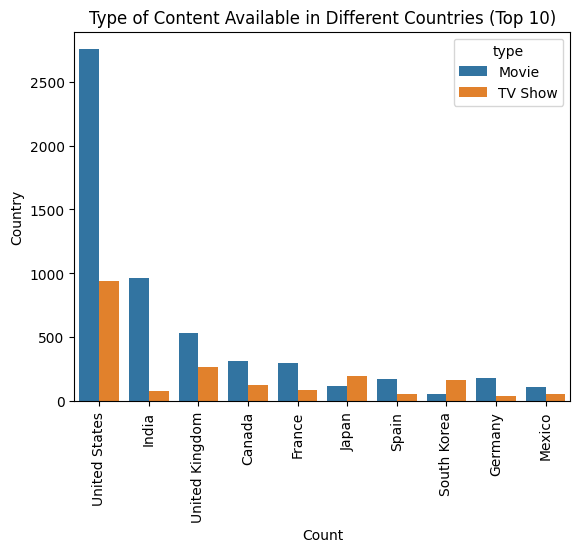

In [ ]:
# graphical analysis
top_10_countries = df_cntry["country"].value_counts().head(10).index
filtered_df = df_cntry[df_cntry["country"].isin(top_10_countries)]
sns.countplot(data = filtered_df, x = "country", hue = "type", order = top_10_countries)
plt.xticks(rotation = 90)
plt.title('Type of Content Available in Different Countries (Top 10)')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

United States is the HIGHEST contributor country on Netflix, followed by India and United Kingdom.

**Distribution of ratings by type**

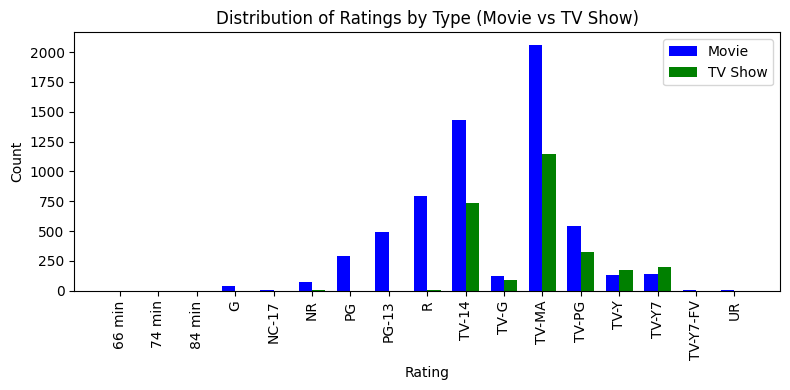

In [ ]:
rating_type_counts = df.groupby(['rating', 'type']).size().unstack(fill_value=0)
ratings = rating_type_counts.index.tolist()
index = range(len(ratings))
bar_width = 0.35

plt.figure(figsize=(8, 4))
plt.bar(index, rating_type_counts['Movie'], width=bar_width, label='Movie', color='blue')
plt.bar([i + bar_width for i in index], rating_type_counts['TV Show'], width=bar_width, label='TV Show', color='green')

# Adding labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings by Type (Movie vs TV Show)')
plt.xticks([i + bar_width / 2 for i in index], ratings, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Highest number of movies and TV shows are rated TV-MA (for mature audiences), followed by TV-14 & R/TV-PG

**Total content distribution by release year of the content**

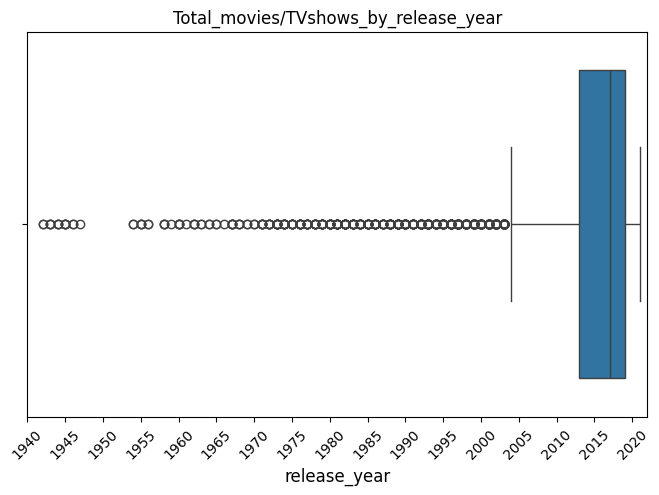

In [ ]:
plt.figure(figsize= (8,5))
sns.boxplot(data = df , x = 'release_year')
plt.xlabel('release_year' , fontsize = 12)
plt.title('Total_movies/TVshows_by_release_year')
plt.xticks(np.arange(1940 , 2021 , 5), rotation = 45)
plt.xlim((1940 , 2022))
plt.show()





*   Netflix have major content which is released in the year range 2000-2021
*   It seems that the content older than year 2000 is almost missing from the Netflix.



**Total movies/TV shows distribution by rating of the content**

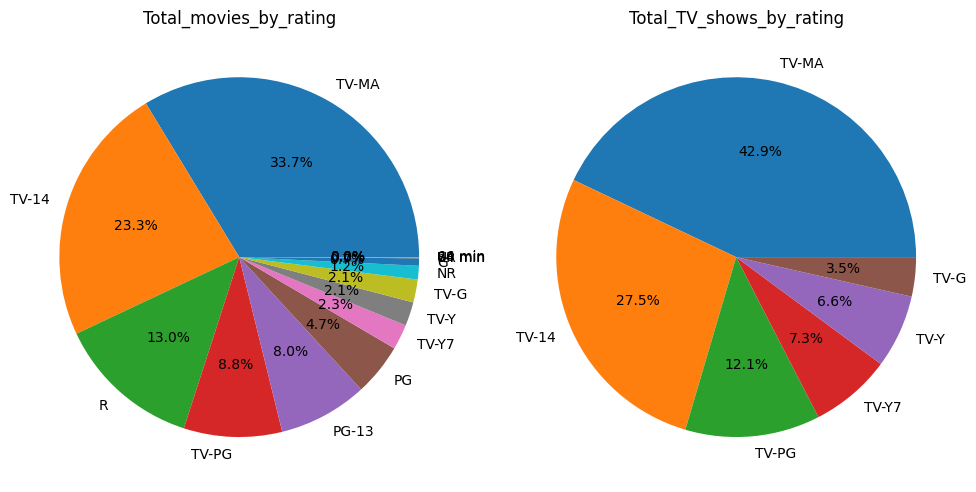

In [ ]:
m = movies.loc[~movies.rating.isin(['Not Available' , 'NC-17' , 'TV-Y7-FV'])]
m = m.rating.value_counts()
t = tv_shows.loc[~tv_shows.rating.isin(['Not Available' , 'R' , 'NR', 'TV-Y7-FV'])]
t = t.rating.value_counts()


fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].pie(m , labels = m.index, autopct='%1.1f%%')
ax[0].set_title('Total_movies_by_rating')

ax[1].pie(t , labels = t.index, autopct='%1.1f%%')
ax[1].set_title('Total_TV_shows_by_rating')

plt.tight_layout()
plt.show()

Highest number of movies and TV shows are rated TV-MA (for mature audiences), followed by TV-14 & R/TV-PG

**Popular listed-in**

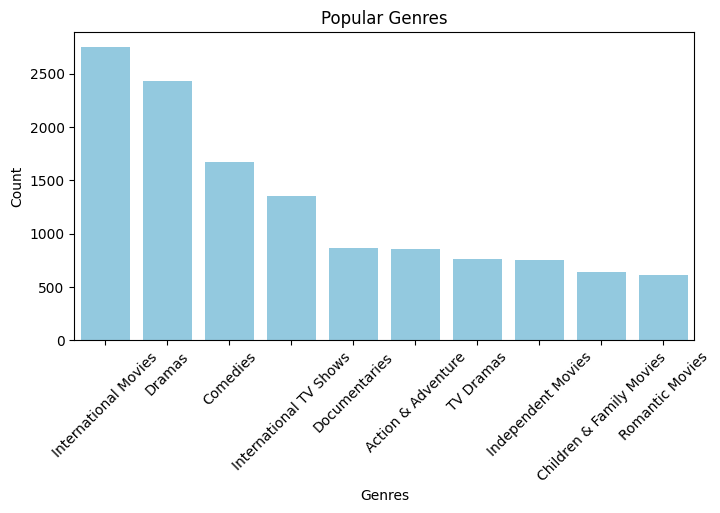

In [ ]:
genres = df['listed_in'].str.split(', ').explode()
genre_counts = genres.value_counts()

top_genres = genre_counts.head(10).reset_index()
top_genres.columns = ['Genre', 'Count']
plt.figure(figsize=(8, 4))
sns.barplot(data=top_genres, x='Genre', y='Count', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Popular Genres')
plt.xticks(rotation=45)
plt.show()

The top 3 popular genres are international movies, dramas and  comedies

# Top 20 Movie Durations on Netflix

<ipython-input-57-78058e3a209c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=movie_durations.head(20), x='duration', y='count', palette='viridis')


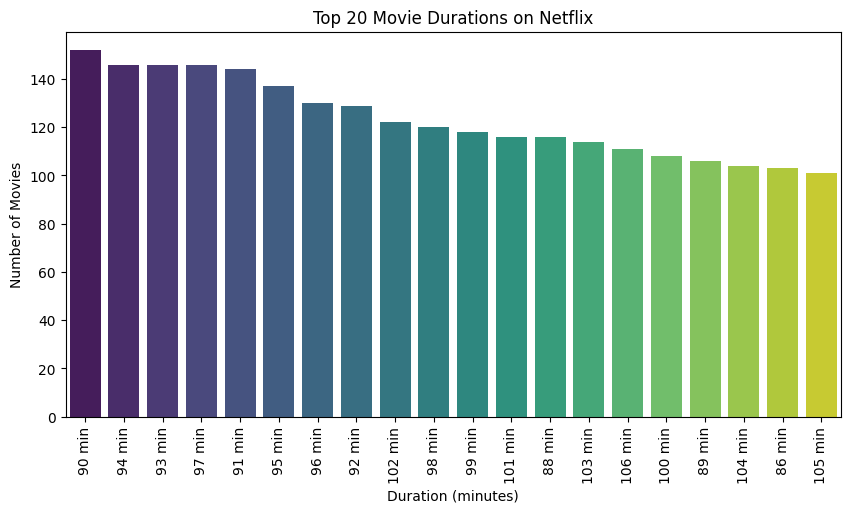

In [ ]:
movie_durations = movies['duration'].value_counts().reset_index()
movie_durations.columns = ['duration', 'count']

# Value counts for TV show durations
tv_show_durations = tv_shows['duration'].value_counts().reset_index()
tv_show_durations.columns = ['duration', 'count']

plt.figure(figsize=(10, 5))
sns.barplot(data=movie_durations.head(20), x='duration', y='count', palette='viridis')
plt.title('Top 20 Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

Based on the Top 20 Movie Durations on Netflix the top 3 durations are 90 min, 94 min, and 93 min.

**TV Show Durations on Netflix**

<ipython-input-59-f224ac67f819>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tv_show_durations, x='duration', y='count', palette='viridis')


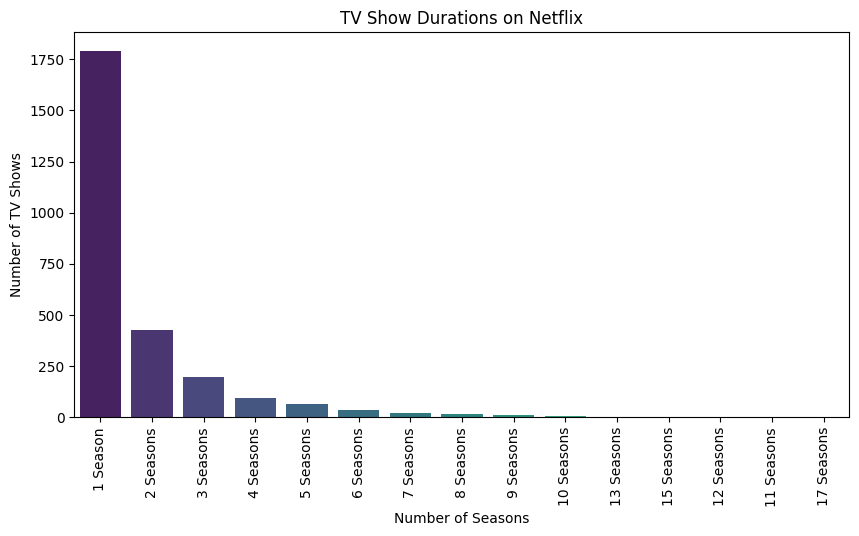

In [ ]:
# Plotting the TV show durations
plt.figure(figsize=(10, 5))
sns.barplot(data=tv_show_durations, x='duration', y='count', palette='viridis')
plt.title('TV Show Durations on Netflix')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=90)
plt.show()

Based on the TV Show Durations on Netflix the top 3 seasons with highest durations are season 1, season 2 and season 3. And there is gradual decrease in the tv-shows


**Bivariate Analysis**

**Countries Vs Genres - Heatmap**

**popular genres in top 20 countries**

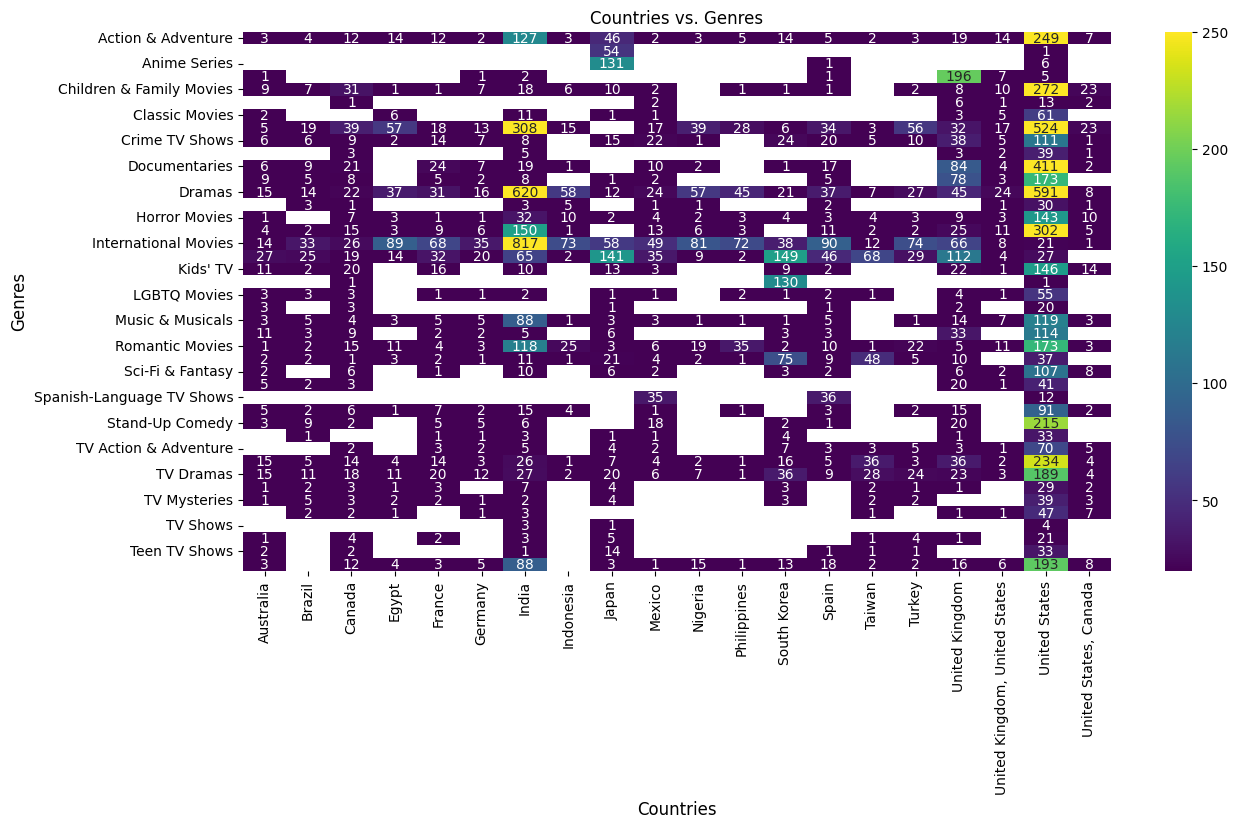

In [ ]:
top_20_country = df['country'].value_counts().head(20).index
top_20_country_df = df[df['country'].isin(top_20_country)]
genres = top_20_country_df[['show_id', 'country', 'listed_in']]
genres = genres.assign(listed_in=genres['listed_in'].str.split(', ')).explode('listed_in')
country_genre_counts = genres.groupby(['country', 'listed_in']).size().reset_index(name='count')
country_genre_pivot = country_genre_counts.pivot(index='listed_in', columns='country', values='count')

plt.figure(figsize=(14, 7))
sns.heatmap(country_genre_pivot, annot=True, fmt=".0f", vmin=20, vmax=250, cmap="viridis")
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.title('Countries vs. Genres', fontsize=12)
plt.show()


*   Popular genres across countries: Action & Adventure, Children & Family

*   Movies, Comedies, Dramas, International Movies & TV Shows, TV Dramas, Thrillers


*   Country-specific genres: Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan), Spanish TV Shows (Argentina, Mexico and Spain)

*   United States and UK have a good mix of almost all genres. Maximum International movies are produced in India.






**Country-wise Rating of Content**

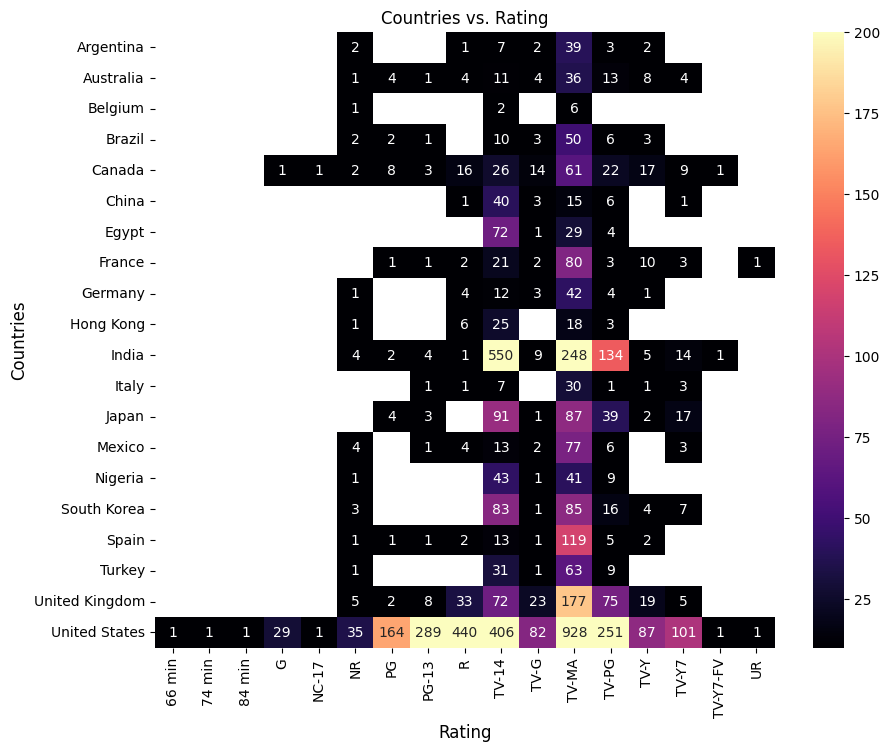

In [ ]:
top_20_country = df_cntry["country"].value_counts().head(20).index
top_20_country_df = df[df['country'].isin(top_20_country)]
country_rating = top_20_country_df.groupby(['country', 'rating']).size().reset_index(name='count')
country_rating_pivot = country_rating.pivot(index='country', columns='rating', values='count')
plt.figure(figsize=(10, 8))
sns.heatmap(data=country_rating_pivot, annot=True, fmt=".0f", cmap="magma", vmin=10, vmax=200)
plt.ylabel('Countries', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.title('Countries vs. Rating', fontsize=12)
plt.show()






*   Overall, Netflix has an large amount of adult content across all countries (TV-MA & TV-14).
*   India also has many titles rated TV-PG, other than TV-MA & TV-14.
Only US, Canada, UK, France and Japan have content for young audiences (TV-Y & TV-Y7).
* There is scarce content for general audience (TV-G & G) across all countries except US.

**Variation in duration of movies by Release year**

<ipython-input-99-cbb33167aaff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_in_minutes'] = movies['duration'].str.replace(' min', '').astype(int)


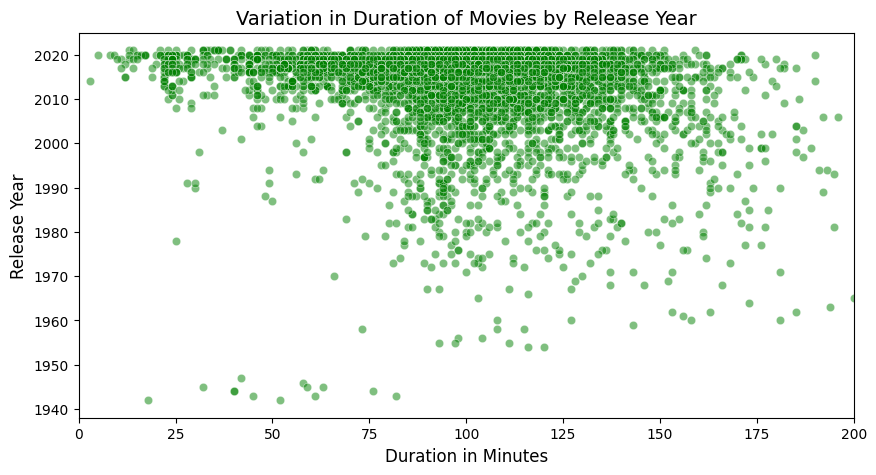

In [ ]:
movies = df[df['type'] == 'Movie'].copy()
movies = movies.dropna(subset=['duration'])
movies['duration_in_minutes'] = movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(10, 5))
sns.scatterplot(data=movies, x='duration_in_minutes', y='release_year', alpha=0.5, color = "green")
plt.xlim((0, 200))
plt.xlabel('Duration in Minutes', fontsize=12)
plt.ylabel('Release Year', fontsize=12)
plt.title('Variation in Duration of Movies by Release Year', fontsize=14)
plt.show()

Observation


*   The movies shorter than 150 minutes duration have increased drastically after 2000 while movies longer than 150 minutes are not much popular.
*   There is a huge surge in the number of shorter duration movies (less than 75 mins) post 2010. Overall, Short movies have been popular in last 10 years.





**Pair plot**

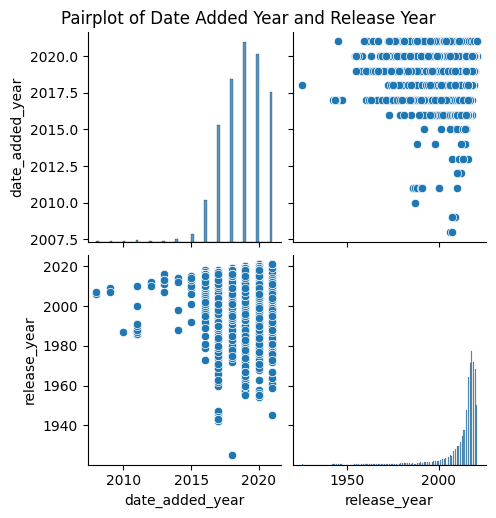

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
# Extracting year from date_added
df['date_added_year'] = df['date_added'].dt.year
df_years = df[['date_added_year', 'release_year']].dropna()
sns.pairplot(df_years)
plt.suptitle('Pairplot of Date Added Year and Release Year', y=1.02)
plt.show()



---

# **6] Insights Based on Non-Graphical and Visual Analysis**


---



**Content Composition and Trends**
* **Content Mix:**

   Approximately 70% of Netflix's content consists of movies, while around 30% is TV shows.
* **Content Upload Timeline:**

  Netflix began uploading content in 2008, with a significant increase starting in 2015. The peak year for content addition was 2019. There was a decline in content additions during 2020 and 2021, likely due to the pandemic, though TV shows did not see as steep a decline as movies.
* **TV Shows vs. Movies:**

  Since 2018, the number of TV shows has been increasing, surpassing movies by mid-2020, indicating a rising popularity of TV shows.

**Diversity and Distribution**
* **Directors and Countries:**

   Netflix features works from approximately 4,993 directors and content from 122 countries. The United States is the largest contributor, accounting for nearly 37% of the total content.
* **Release Years:**

  The majority of shows were released between 2005 and 2021.
* **Duration:**

  Movie durations typically range from 50 to 150 minutes, while TV shows usually have 1 to 3 seasons.

**Content Ratings and Audience**
* **Ratings:**

  The highest number of movies and TV shows are rated TV-MA (for mature audiences). Other ratings, such as TV-Y7, TV-Y7 FV, PG, TV-G, G, TV-Y, and TV-PG, are less common globally, except in the US.
* **Audience Targeting:**

   Netflix offers content for various viewer categories, including kids, adults, and families.

**Popular Genres**
* **Top Genres:**

  The most popular genres on Netflix are International Movies and TV Shows, Dramas, and Comedies.
* **Country-Specific Genres:**
   Different countries have distinct popular genres. For example, Korean TV shows are popular in Korea, British TV shows in the UK, and Anime features and series in Japan. The United States has a diverse mix of almost all genres.

**Actors and Movie Duration Trends**

* **Actor Representation:**

   Indian actors feature in the highest number of movies on Netflix, with the top 5 most prolific actors being from India.
* **Movie Duration:**
   There has been a trend towards shorter duration movies over the past 10 years.
* These insights highlight Netflix's diverse content offerings, shifting  trends in TV shows and movies, and the platform's global reach and audience targeting strategies.



---

# **7] Business Insights**



---





* Netflix predominantly features content released after the year 2000, with older content being quite rare. This scarcity of pre-2000 material could be a missed opportunity to engage senior citizens who might prefer such content.
* The platform's content ratings are primarily geared towards mature audiences:

  * Over 80% of content falls under the following ratings:
  * TV-MA: For mature audiences aged 17 and above.
  * TV-14: Suitable for viewers aged 14 and above.
  * TV-PG: Parental guidance suggested (similar to PG-13).
  * R: Restricted content, not suitable for viewers under 17.

* The remaining 20% is content aimed at children under 13, indicating that Netflix's primary audience consists of mature viewers and children with parental supervision.

* Popular genres on Netflix include:

    * International Movies and TV Shows
    * Dramas
    * Comedies
    * Action & Adventure
    * Children & Family Movies
    * Thrillers
* Approximately 75% of Netflix's content originates from the top 10 contributing countries, while the rest of the world accounts for just 25%. Expanding content from a wider range of countries could help grow the business.
* There is a growing preference for shorter duration content, typically ranging from 75 to 150 minutes for movies and 1 to 3 seasons for TV shows. This trend should be considered in the production of new content.Finally, there was a noticeable drop in content production across all countries and genres in 2020 and 2021, likely due to the pandemic.



---

# **8] Recommendations**


---



* Very limited genres are focussed in most of the countries except US. It seems the current available genres suits best for US and few countries but maximum countries need some more genres which are highly popular in the region. eg. Indian Mythological content is highly popular. We can create such more country specific genres and It might also be liked acorss the world just like Japanese Anime.

* **Targeted Marketing:** Use insights on country-specific content preferences to tailor marketing strategies and recommendations, enhancing viewer satisfaction and retention.

* **Expand International Content:** Invest in producing and acquiring content from a more diverse range of countries to appeal to global audiences and tap into emerging markets.

* **Country specific insights:** The content need to be targetting the demographic of any country. Netflix can produce higher number of content in the perticular rating as per demographic of the country. Eg

1.**Increase Focus on Popular Genres:**



  * **Insight:** Certain genres like Dramas, Documentaries, and International TV Shows are prevalent.

  * **Action:** Invest in producing more content in these genres to cater to existing demand.

2.**Diversify Content by Country:**

* **Insight:** The majority of content is concentrated in a few countries like the United States, India, and the United Kingdom.

* **Action:** Expand production and acquisition efforts in underrepresented countries to appeal to a more global audience and tap into new markets.

3.**Balance Between Movies and TV Shows:**

* **Insight:** While both movies and TV shows are popular, there has been a trend towards more TV shows in recent years.

* **Action:** Maintain a balanced portfolio by continuing to produce both high-quality movies and TV shows, catering to varied audience preferences.

4.**Optimize Release Timing:**

* **Insight:** Certain months and weeks show higher content addition rates.

* **Action:** Release new shows and movies during peak periods, such as the beginning and end of the year, to maximize viewership.

5.**Highlight Top Directors and Actors:**

* **Insight:** Content involving certain directors and actors consistently perform well.
* **Action:** Promote and invest in projects involving popular directors and actors to leverage their existing fan base.

6.**Improve Accessibility and Localization:**

* International shows and movies are in demand.Increase the availability of subtitles and dubbing in multiple languages to make international content more accessible.

7.**Monitor and Update Content Regularly:**

* New content is frequently added, but there are gaps between release and Netflix addition dates. Shorten the time between the theatrical release and Netflix addition for new movies to keep the platform fresh and engaging.



These recommendations are designed to be straightforward and actionable, helping Netflix to leverage data-driven insights to enhance content strategy and grow the business effectively.

